# Customer Experience Dataset - Veri Analizi Projesi
Buse Nur Yanık - Haziran 2025

Bu veri setini seçmemin sebeplerinden ilki kullanıcı deneyimi (UI/UX) alanına ilgi duymam nedeniyle, müşteri davranışlarını içermesi (cinsiyet, lokasyon ve müşteri sadakati, yaş, site üzerinde geçirilen süre ve satın alınan ürün sayısı gibi) diğer sebebi ise eksik ya da aykırı değer içermemesi.

## Gerekli Küyüphanelerin Yüklenmesi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Veri setinin yüklenmesi

In [ ]:
df = pd.read_csv('/content/customer_experience_data.csv')
print(df.head())

   Customer_ID  Age  Gender  Location  Num_Interactions  Feedback_Score  \
0            1   56    Male     Urban                11               4   
1            2   69    Male  Suburban                10               3   
2            3   46    Male     Urban                 5               5   
3            4   32  Female  Suburban                 5               1   
4            5   60    Male     Urban                14               5   

   Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
0                  18               38           18.319606   
1                   2               17            9.015198   
2                  11               46           45.921572   
3                   6               13           44.105053   
4                   8               46           17.897471   

   Satisfaction_Score Retention_Status  Gender_Encoded  Location_Encoded  \
0                   7         Retained               1                 2   
1                   6   

## Sütunları sayısal ve kategorik olarak ayırma

In [ ]:
sayisal_sutunlar = df.select_dtypes(include='number').columns.tolist()
kategorik_sutunlar = df.select_dtypes(include='object').columns.tolist()

print("Sayısal sütunlar:", sayisal_sutunlar)
print("Kategorik sütunlar:", kategorik_sutunlar)

Sayısal sütunlar: ['Customer_ID', 'Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased', 'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score', 'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded']
Kategorik sütunlar: ['Gender', 'Location', 'Retention_Status']


Bu veri setinde 1000 müşteriye ait bilgiler yer almaktadır. Veri seti hem sayısal hem de kategorik türde verileri içermektedir.
- Kategorik veriler: Müşterilerin cinsiyeti, yaşadığı bölge ve müşteri sadakati gibi bilgileri içeriyor.
- Sayısal veriler: Yaş, etkileşim sayısı, geri bildirim puanı, satın alınan ürün sayısı, sitede geçirilen süre ve memnuniyet puanı gibi bilgileri içeriyor.

## Eksik değer kontrolü

In [ ]:
print(df.isnull().sum())

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64


Bu veri setinde eksik değer bulunmamaktadır.

## IQR ile aykırı Değer kontrolü

In [ ]:
outlier_info = {}
for col in sayisal_sutunlar:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    alt_sin = q1 - 1.5 * iqr
    ust_sin = q3 + 1.5 * iqr

    mask = (df[col] < alt_sin) | (df[col] > ust_sin)
    count = mask.sum()
    outlier_info[col] = count
    print(f"{col}: {count} aykırı değer bulundu")


Customer_ID: 0 aykırı değer bulundu
Age: 0 aykırı değer bulundu
Num_Interactions: 0 aykırı değer bulundu
Feedback_Score: 0 aykırı değer bulundu
Products_Purchased: 0 aykırı değer bulundu
Products_Viewed: 0 aykırı değer bulundu
Time_Spent_on_Site: 0 aykırı değer bulundu
Satisfaction_Score: 0 aykırı değer bulundu
Gender_Encoded: 0 aykırı değer bulundu
Location_Encoded: 0 aykırı değer bulundu
Retention_Status_Encoded: 0 aykırı değer bulundu


Vu veri setinde aykırı değer bulunmamaktadır.

## Aykırı değer kontrolünü görselleştirme

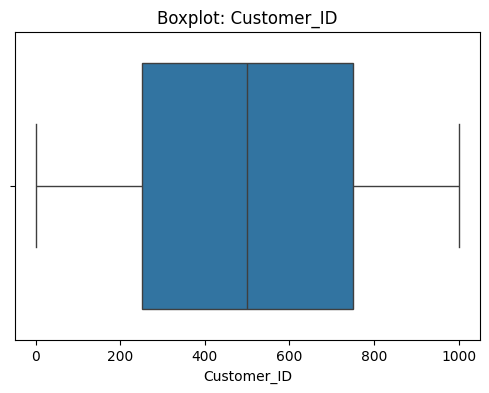

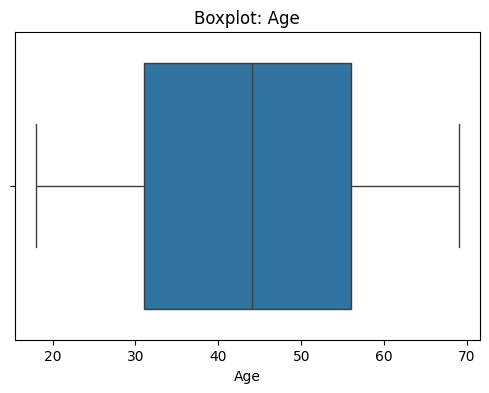

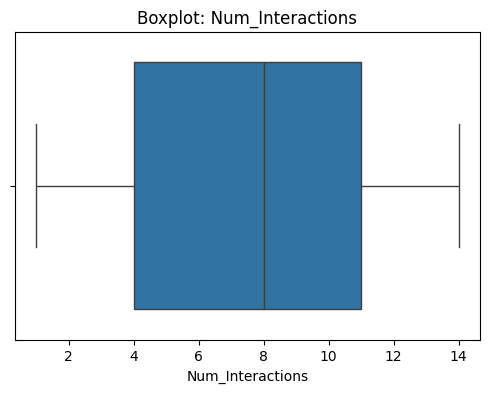

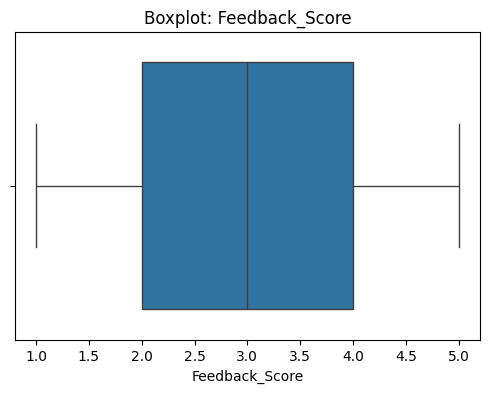

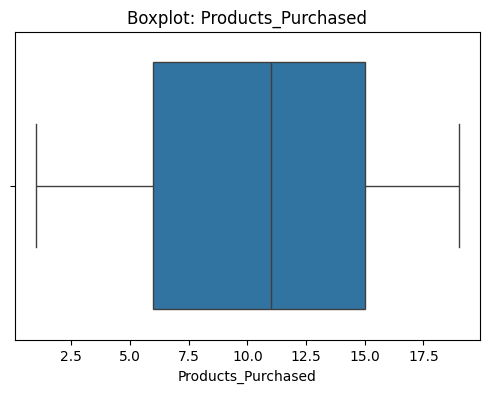

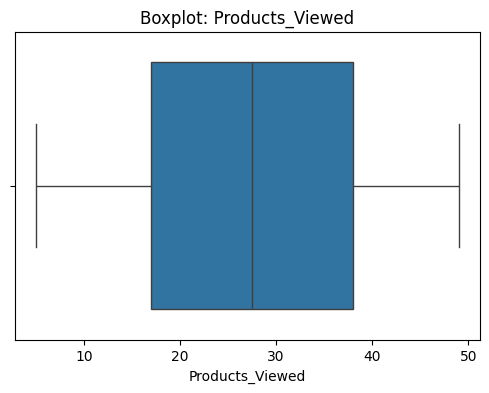

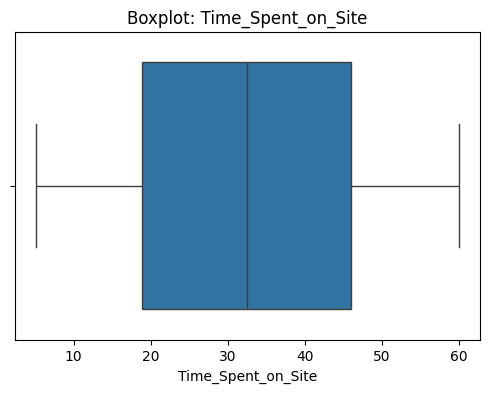

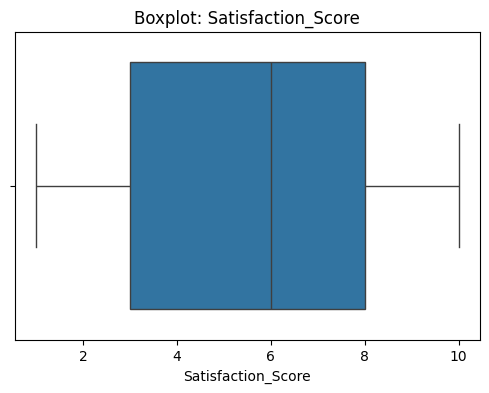

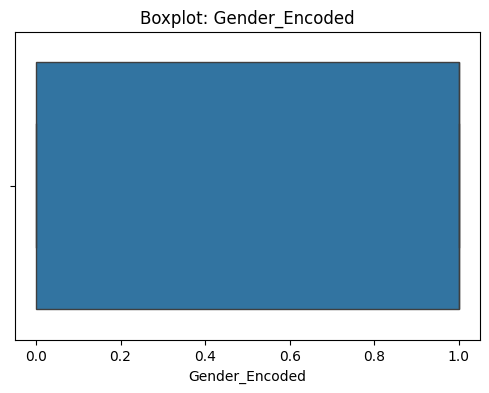

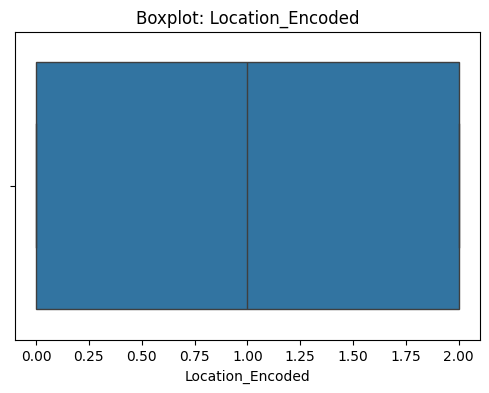

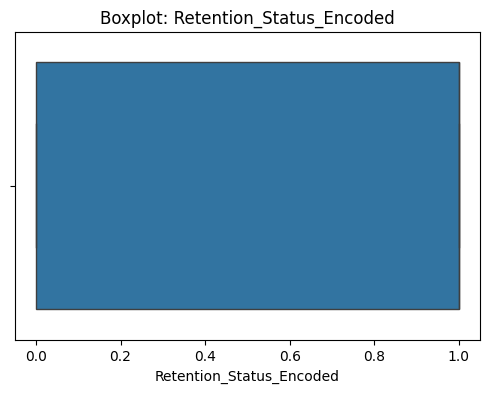

In [ ]:
for col in sayisal_sutunlar:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

## Sayısal sütunlar için istatistiksel özet

In [ ]:
print("\nSayısal sütunlar için özet istatistikler:")
print(df[sayisal_sutunlar].describe())


Sayısal sütunlar için özet istatistikler:
       Customer_ID         Age  Num_Interactions  Feedback_Score  \
count  1000.000000  1000.00000       1000.000000     1000.000000   
mean    500.500000    43.81900          7.545000        2.985000   
std     288.819436    14.99103          4.016978        1.418022   
min       1.000000    18.00000          1.000000        1.000000   
25%     250.750000    31.00000          4.000000        2.000000   
50%     500.500000    44.00000          8.000000        3.000000   
75%     750.250000    56.00000         11.000000        4.000000   
max    1000.000000    69.00000         14.000000        5.000000   

       Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
count         1000.000000      1000.000000         1000.000000   
mean            10.417000        27.370000           32.274399   
std              5.345623        12.939572           15.734978   
min              1.000000         5.000000            5.114208   
25%           

Bu veri setinde
- Yaş ortalaması 43, en küçük yaş 18, en büyük müşteri yaşı ise 69'dur. Medyan 44 olup ortalama yaşa yakındır.
- Etkileşim sayısı ortlaması 7, minumum değer 1, maksimum değer ise 14'tür. Medyanı 8 olup ortalamaya yakındır.
- Geri bildirim puanı 1 ile 5 arasından ortlama 3'e yakındır. Medyanı 3 olup ortalama ile çok yakın değerdedir.
- Görüntülenen ürün sayısı ortlama 27, minumum 5, maksimum 49'dur. Medyanı 27'dir.
- Satın alınan ürün sayısı ortalama 10, minumum 1, maksimum 19. Medyanı 11'dir.
- Sitede geçirilen süre ortalama 32.27 dakika, minimum 5.11 dakika , maksimum 59.95 dakikadır.
- Müşteri memnuniyeti 1 ile 10 arasından ortalama 5.54'dır. Medyanı ise 6'dır.
- Müşteri kitlesi ağırlıklı olarak orta yaş grubundan.
- Etkileşim sayısı ile alınan ürün karşılaştırıldığında satın alınan ürünün daha fazla olması müşterilerin etkişelim sonrası birden fazla ürün satın aldığını gösteriyor.
- Müşteri memnuniyeti ve geri bildirim değerleri müşterilerin genel olarak memnun olduğunu gösteriyor.

## Kategorik sütunlar için frekans tabloları

In [ ]:
print("\nKategorik sütunlar için frekans tablosu:")
for col in kategorik_sutunlar:
    print(f"\n{col} sütunu değer dağılımı:")
    print(df[col].value_counts())


Kategorik sütunlar için frekans tablosu:

Gender sütunu değer dağılımı:
Gender
Male      524
Female    476
Name: count, dtype: int64

Location sütunu değer dağılımı:
Location
Urban       344
Suburban    344
Rural       312
Name: count, dtype: int64

Retention_Status sütunu değer dağılımı:
Retention_Status
Retained    694
Churned     306
Name: count, dtype: int64


Bu veri seti
- 524 erkek müşteri ve 476 kadın müşteri vardır. Az farkla erkek müşteri daha fazladır.
- Lokasyon olarak kentsel 344 ve kırsal aladan 312'dir. Müşteriler daha çok şehir merkezinden ya da yakın çevreden olsa da kırsal bölgedeki müşterileri de bu sayıya yakındır.
- kaybedilen müşteri sayısı 306 olsa da korunan müşteri sayısı 694 kişi ile iki katından fazladır. Bu da müşteri bağımlılığının yüksek olduğunu gösterir.

## Kategorik sütunların görselleştirilmesi

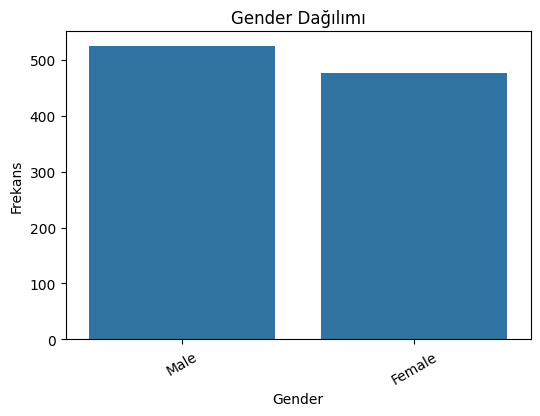

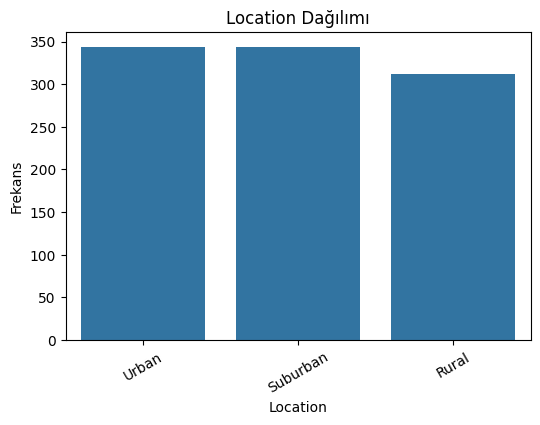

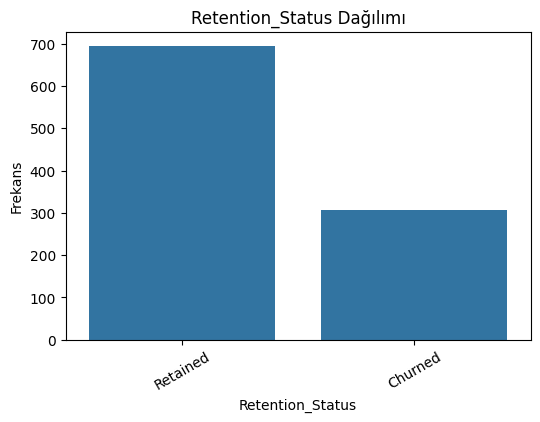

In [ ]:
for col in kategorik_sutunlar:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Dağılımı')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.xticks(rotation=30)
    plt.show()

## Pie Chart

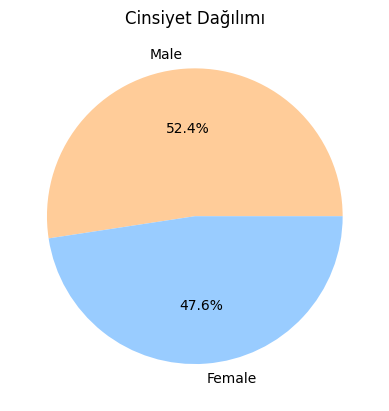

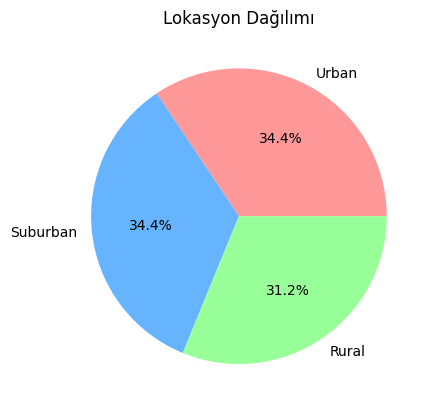

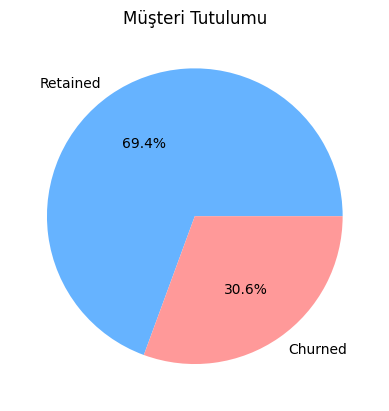

In [ ]:
# Cİnsiyet için
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ffcc99','#99ccff'])
plt.title('Cinsiyet Dağılımı')
plt.ylabel('')
plt.show()

# Lokasyon için
df['Location'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Lokasyon Dağılımı')
plt.ylabel('')
plt.show()

# Müşteri tutulumu için
df['Retention_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Müşteri Tutulumu')
plt.ylabel('')
plt.show()

## Sayısal sütunların görselleştirmesi

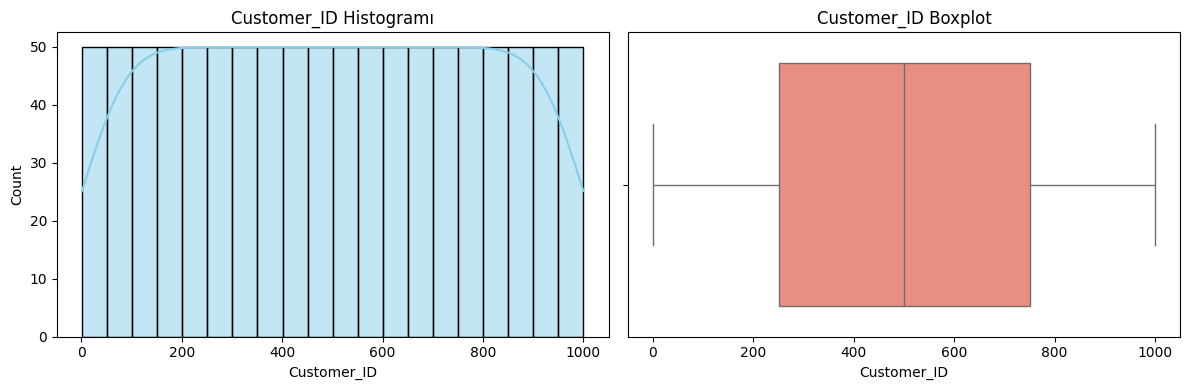

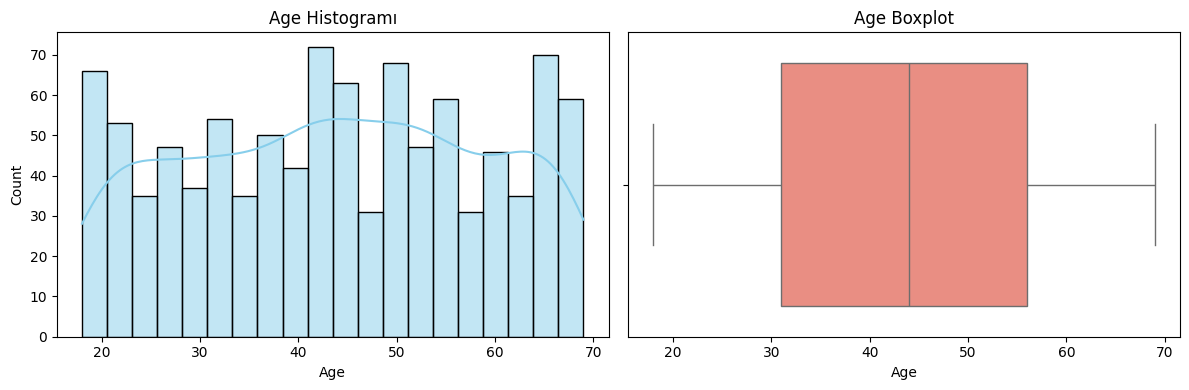

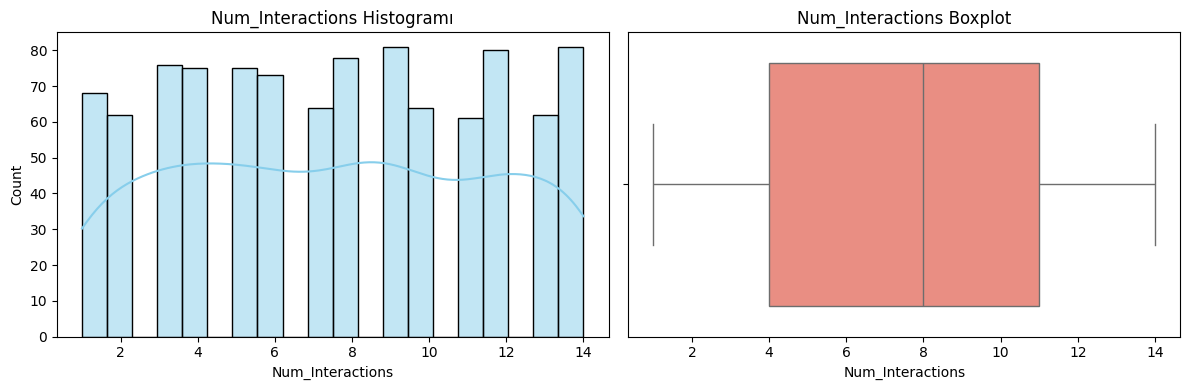

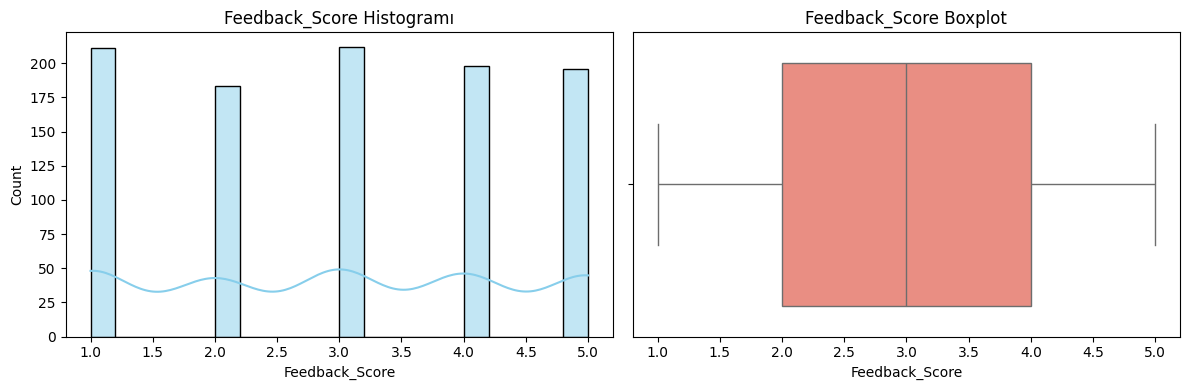

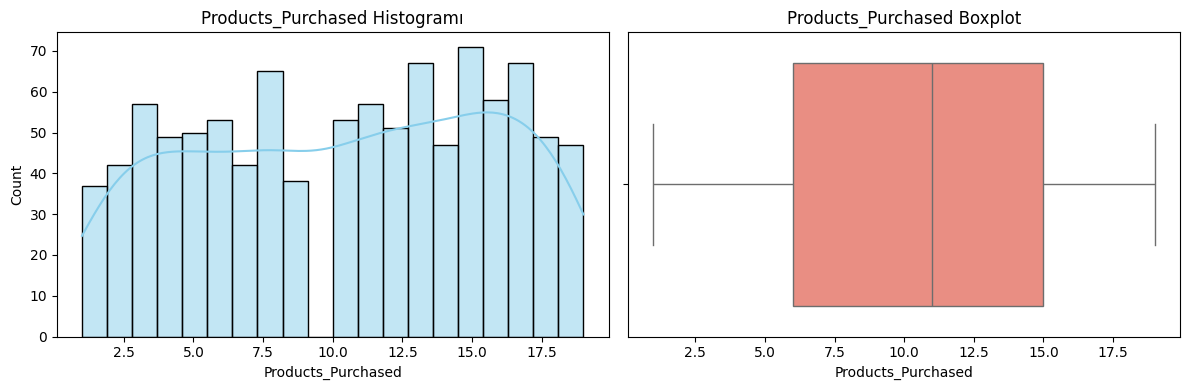

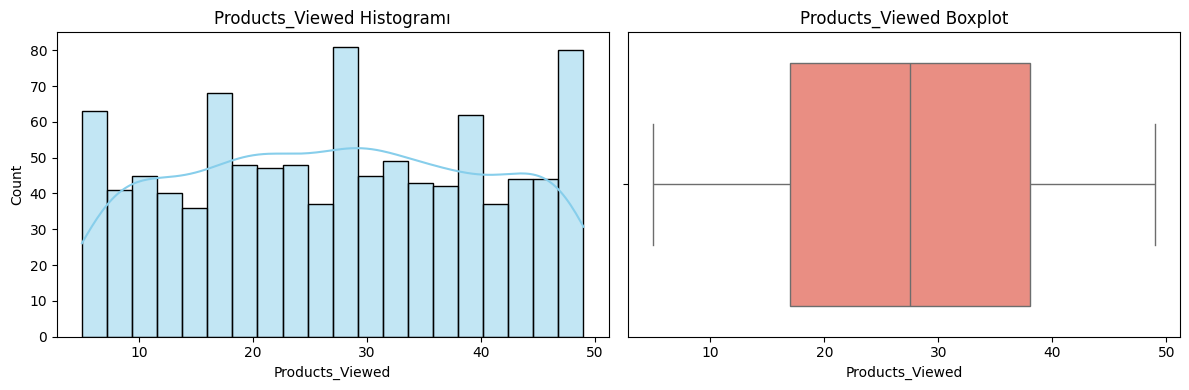

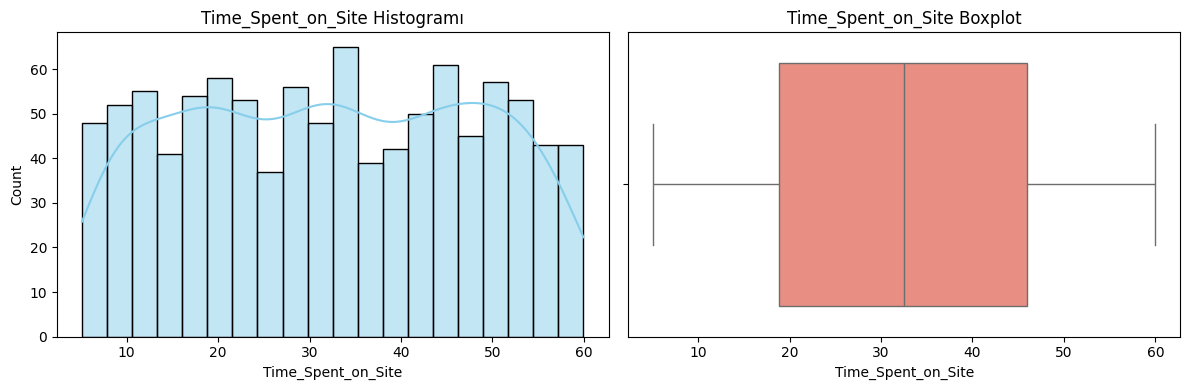

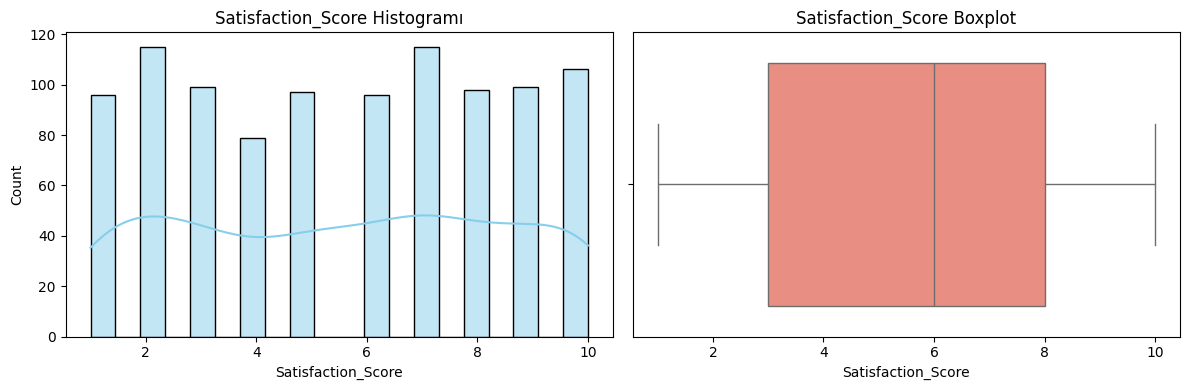

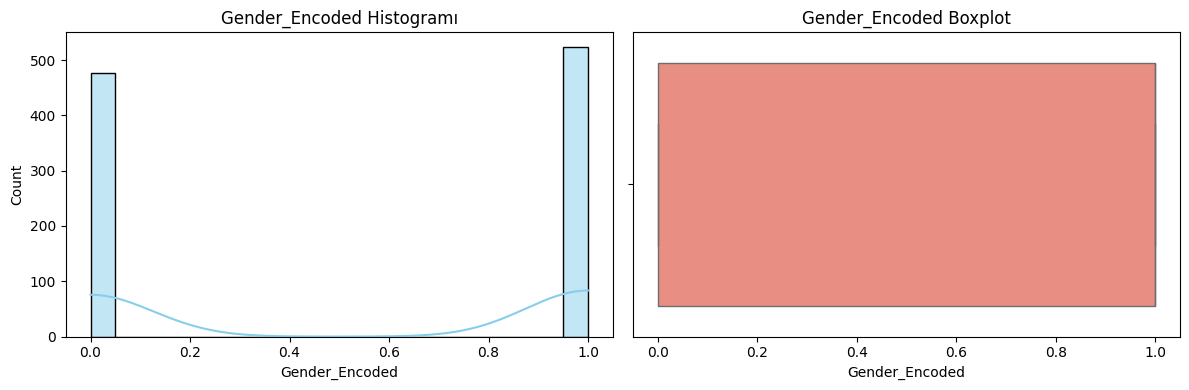

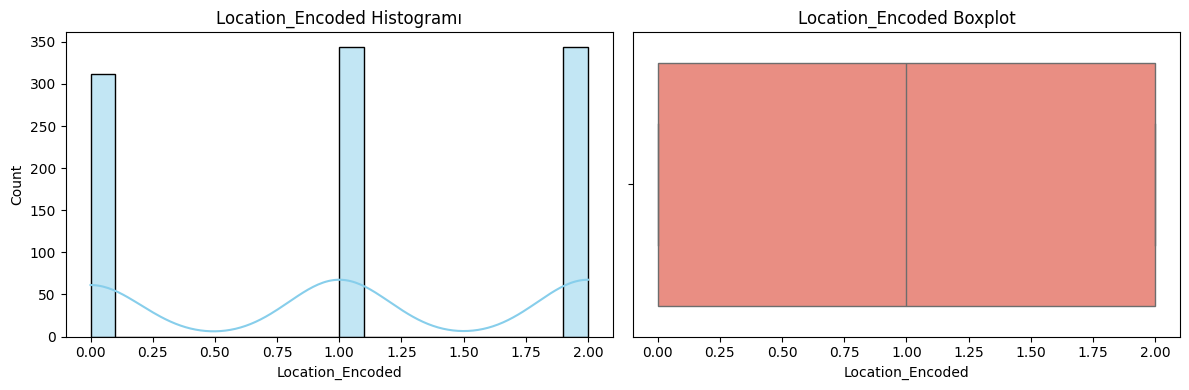

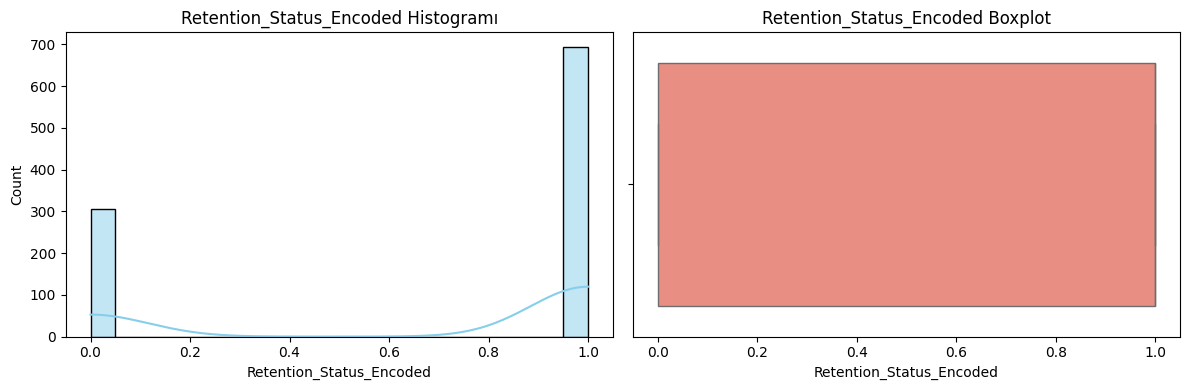

In [ ]:
for col in sayisal_sutunlar:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=20, color='skyblue')
    plt.title(f'{col} Histogramı')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, color='salmon')
    plt.title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

## Sonuç
 Bu projede Customer Experience Dataset kullanılarak temel veri analiz adımları uygulanmaktadır.
 - Sayısal ve kategorik değişkenler analiz edildi.
 - Sayısal sütunlar için istatiksel özet çıkarıldı ve kategorik sütunlar için frekans analizleri yapıldı.
 - Eksik değer ve aykırı değer analizi yapıldı. Eksik değer ve aykırı değer bulunmadı.
 - Farklı grafiklerle görselleştirmeler yapıldı ve veri seti daha iyi anlaşıldı.
